In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,make_scorer,classification_report
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline



import re
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('text.csv')

In [25]:
#The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [3]:
data.head(2)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0


In [4]:
data.shape

(416809, 3)

In [5]:
# checking distribution of all the classes

In [6]:
data['label'].value_counts(normalize=True)

1    0.338445
0    0.290749
3    0.137514
4    0.114470
2    0.082901
5    0.035921
Name: label, dtype: float64

In [21]:
data[data['label']==0].head(2)

,Unnamed: 0,text,label
1,1,ive enjoyed being able to slouch about relax a...,0
3,3,i dont know i feel so lost,0


In [20]:
data[data['label']==1].head(2)

,Unnamed: 0,text,label
7,7,i fear that they won t ever feel that deliciou...,1
10,10,i try to be nice though so if you get a bitchy...,1


In [19]:
data[data['label']==2].head(2)

,Unnamed: 0,text,label
6,6,i would think that whomever would be lucky eno...,2
30,30,i guess that feeling is what im really getting...,2


In [16]:
data[data['label']==3].head(2)

,Unnamed: 0,text,label
13,13,i feel like a jerk because the library student...,3
17,17,i miss all the others as well that feel that i...,3


In [17]:
data[data['label']==4].head(2)

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
2,2,i gave up my internship with the dmrg and am f...,4


In [18]:
data[data['label']==5].head(2)

,Unnamed: 0,text,label
8,8,im forever taking some time out to have a lie ...,5
89,89,i was feeling really overwhelmed,5


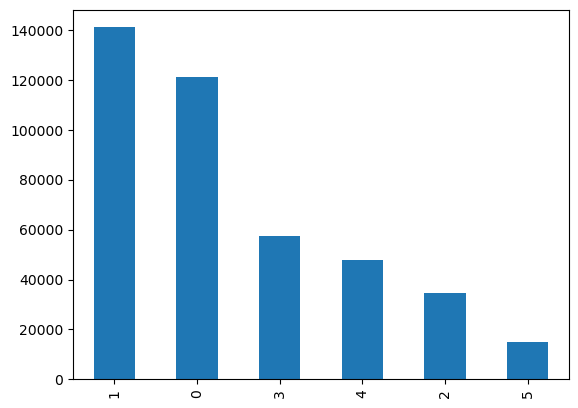

In [24]:
# visualizing all the categories of target
data.label.value_counts().plot(kind='bar')
plt.show()

In [31]:
## text preprocessing

In [32]:
custom_stopwords = [
    "i","im","like", "feel", "feeling", "my", "the", "to", "still"
                     "for","know","littl","think","time","thing","would","go",
                     "really","feel","am","so","get", "one", "to", "and", "at", "can",
                     "day","way", "make", "me", "want", "could" , "would", "tri", "u"                      
                     ]


all_stopwords=stopwords.words('english') + custom_stopwords

print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace all runs of whitespaces with a single space
    # Optionally, remove stopwords and stem
    words = text.split()
    words = [word for word in words if word not in all_stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)



In [34]:
data['text'] = data['text'].apply(clean_text)

In [43]:
# as there are few lable that have very less data so it will create a data imbalance to just taking 3 labels 


In [35]:
def reduceLabels(text):
    # print(type(text))
    if text==0 or text==3:
        return 0
    elif text==1 or text==2:
        return 1
    elif text==4 or text==5:
        return 2
    return 2

# Reduce the labels
data['label'] = data['label'].apply(reduceLabels)

In [36]:
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

In [37]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [38]:
# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.922266740241357
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     35642
           1       0.95      0.92      0.93     35093
           2       0.88      0.88      0.88     12627

    accuracy                           0.92     83362
   macro avg       0.91      0.91      0.91     83362
weighted avg       0.92      0.92      0.92     83362



In [39]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.922266740241357
Precision: 0.9227633092197493
Recall: 0.922266740241357
F1 Score: 0.922322088815294


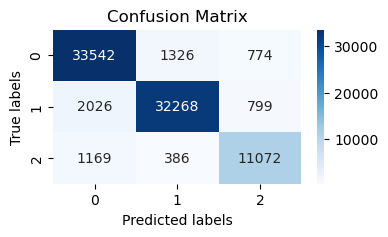

In [40]:
# plotting the heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()